Enter Sepal Length and Sepal Width separated by comma :  5,5
Enter number of neighbors (k):  5
Choose distance metric (euclidean/manhattan):  euclidean



Predicted Class: setosa using euclidean distance


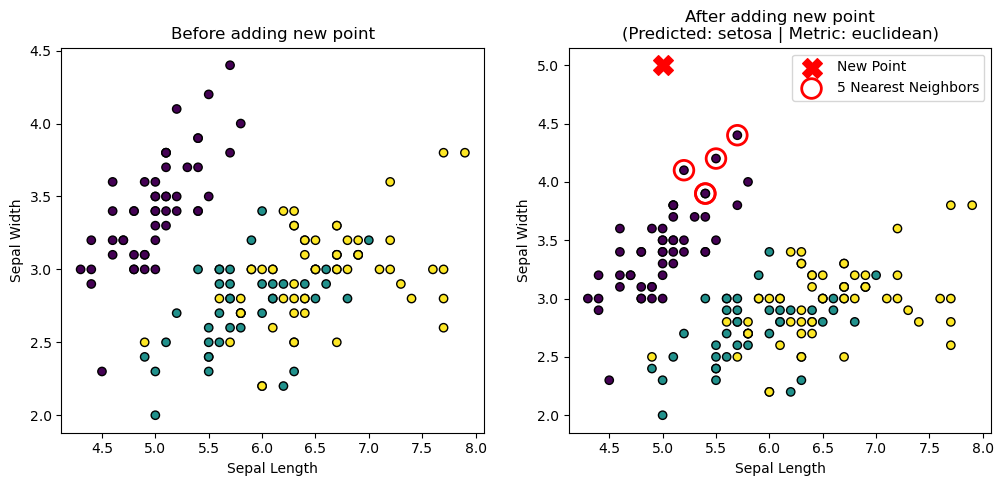

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # use first 2 features (for easy plotting)
y = iris.target
target_names = iris.target_names

# Take user input for new datapoint
user_input = input("Enter Sepal Length and Sepal Width separated by comma : ")
sl, sw = map(float, user_input.split(","))
new_point = np.array([sl, sw])

# Take input for K
k = int(input("Enter number of neighbors (k): "))

# Choose distance metric
metric = input("Choose distance metric (euclidean/manhattan): ").strip().lower()

# Compute distances
if metric == "euclidean":
    distances = np.linalg.norm(X - new_point, axis=1)
elif metric == "manhattan":
    distances = np.sum(np.abs(X - new_point), axis=1)
else:
    raise ValueError("Invalid metric. Choose 'euclidean' or 'manhattan'.")

# Find k nearest neighbors
k_indices = np.argsort(distances)[:k]
k_labels = y[k_indices]

# Majority vote
predicted_class = Counter(k_labels).most_common(1)[0][0]
print(f"\nPredicted Class: {target_names[predicted_class]} using {metric} distance")

# Plot
plt.figure(figsize=(12,5))

# Before
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='k')
plt.title("Before adding new point")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# After (with neighbors highlighted)
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='k')
plt.scatter(new_point[0], new_point[1], c='red', marker='X', s=200, label="New Point")
plt.scatter(X[k_indices,0], X[k_indices,1], c='none', edgecolor='red', s=200, linewidths=2, label=f"{k} Nearest Neighbors")

plt.title(f"After adding new point\n(Predicted: {target_names[predicted_class]} | Metric: {metric})")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.show()
